In [ ]:
#pip install polyase

# if on mac M1:
# pip install polars==0.10.9

In [2]:
import polyase as poly
import pandas as pd
import RNApysoforms as RNApy
import polars as pl

/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/sorted_nearest/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
poly.__version__

'0.1.8'

# Running Polyase on tetraploid potato sample 

### Required Files

Files necessary for this tutorial are deposited on Zenodo ([tutorial_data](https://zenodo.org/records/17590760/files/polyase_tutorial_atlantic.zip?download=1&preview=1)):

- **Syntelog finder output**: To assign genes based on syntelogous relationships
- **Oarfish directory**: Contains transcript quantification data
- **GFF file (liftoff annotation)**: Genome annotation from liftoff
- **GFF file (novel transcripts)**: Novel identified transcripts
- **Functional gene annotation**: Gene functional annotations

### Installation of polyase 


You can install polyase using pip:
```bash
pip install polyase
```


## 1) Reading in the data 

In this section we will read in the data genespace output file, transcript quanitfication directory, tx2gene. 

In [ ]:
input_dir = 'polyase_tutorial_atlantic'

In [13]:
# File with syntelog categories from SyntelogFinder
var_obs_file = f"{input_dir}/unitato2Atl.no_scaffold.no_hap0_genespace_categories.tsv"
# Directory of gene counts from oarfish generated by long-read quantification pipeline
gene_counts_dir = f"{input_dir}/oarfish/"
tx2gene = f"{input_dir}/combined.tx2gene.tsv"

### Dataset Information

**Source**: [Hoopes et al., 2022](https://doi.org/10.1016/j.molp.2022.01.003)

**Organism**: *Solanum tuberosum* cv. Atlantic (tetraploid)

**Experimental Design**:
- **10 samples** total from cultivar Atlantic
- **2 tissues**: Leaf and tuber
- **Biological replicates**: 5 samples per tissue type
- **Sequencing**: Long-read RNA-seq (ONT)
- **Quantification**: Oarfish transcript-level counts

**Sample Information**:

| Sample ID    | Tissue | Description |
|--------------|--------|-------------|
| SRR14993892  | Leaf   | Replicate 1 |
| SRR14993893  | Leaf   | Replicate 2 |
| SRR14993894  | Leaf   | Replicate 3 |
| SRR14993895  | Leaf   | Replicate 4 |
| SRR14996168  | Leaf   | Replicate 5 |
| SRR14995031  | Tuber  | Replicate 1 |
| SRR14995032  | Tuber  | Replicate 2 |
| SRR14995033  | Tuber  | Replicate 3 |
| SRR14995034  | Tuber  | Replicate 4 |
| SRR14995933  | Tuber  | Replicate 5 |

In [14]:
# Define sample IDs and their conditions
sample_info = {
    "SRR14993892": "leaf",
    "SRR14993893": "leaf",
    "SRR14993894": "leaf",
    "SRR14993895": "leaf",
    "SRR14996168": "leaf",
    "SRR14995031": "tuber",
    "SRR14995032": "tuber",
    "SRR14995033": "tuber",
    "SRR14995034": "tuber",
    "SRR14995933": "tuber"
} 

# With isoforms
adata_isoform = poly.load_ase_data(
    var_obs_file=var_obs_file,
    sample_info=sample_info,
    tx_to_gene_file=tx2gene,
    isoform_counts_dir=gene_counts_dir,
    quant_dir=gene_counts_dir
)

Loading metadata files...
Loading counts for 10 samples in parallel...
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Successfully loaded 10 out of 10 samples
Concatenating count matrices...
Creating isoform metadata...
Adding var_obs annotations for 250224 transcripts...
Found 167997 genes with var_obs annotations
Found 33730 genes without var_obs annotations (will be filled with NaN)
Assigning Synt_id values...
Assigned Synt_id values for 33730 genes (41291 transcripts)
Keeping all 250224 transcripts from expression data
Statistics:
  - Total transcripts: 250224
  - Transcripts with gene_id annotation: 250224
  - Transcripts with var_obs data: 208933
  - Transcripts with NaN var_obs data: 41291
  - Transcr

In [15]:
adata_isoform

AnnData object with n_obs × n_vars = 10 × 250224
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size'
    var: 'transcript_id', 'gene_id', 'feature_type', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm'

In [16]:
adata_isoform.var.head()

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation
Sotub01g008850.1.1.Hap1,Sotub01g008850.1.1.Hap1,Sotub01g008850.Hap1,transcript,Synt_id_8507,1hap1_1hap2_1hap3_1hap4_no_s,"Sotub01g008850.1.1.Hap1,Sotub01g008850.1.1.Hap...",hap1,NaN,NaN
Soltu.DM.06G021730.1.Hap4,Soltu.DM.06G021730.1.Hap4,Soltu.DM.06G021730.Hap4,transcript,Synt_id_7225,2hap1_2hap2_1hap3_2hap4_no_s,"Soltu.DM.06G021730.1.Hap1,Soltu.DM.08G023360.1...",hap4,NaN,NaN
PGSC0003DMT400088250.Hap2,None,PGSC0003DMG400037821.Hap2,transcript,1,None,None,None,None,None
Sotub08g013150.1.1.Hap3,Sotub08g013150.1.1.Hap3,Sotub08g013150.Hap3,transcript,Synt_id_27071,0hap1_1hap2_1hap3_1hap4_no_s,"nan,Sotub08g013150.1.1.Hap2,Sotub08g013150.1.1...",hap3,NaN,NaN
Soltu.DM.03G027120.1.Hap3,Soltu.DM.03G027120.1.Hap3,Soltu.DM.03G027120.Hap3,transcript,Synt_id_25416,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.03G027120.1.Hap1,Soltu.DM.03G027120.1...",hap3,less_1%_difference,equal_lengths


In [17]:
adata_isoform.var.head()

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation
Sotub01g008850.1.1.Hap1,Sotub01g008850.1.1.Hap1,Sotub01g008850.Hap1,transcript,Synt_id_8507,1hap1_1hap2_1hap3_1hap4_no_s,"Sotub01g008850.1.1.Hap1,Sotub01g008850.1.1.Hap...",hap1,NaN,NaN
Soltu.DM.06G021730.1.Hap4,Soltu.DM.06G021730.1.Hap4,Soltu.DM.06G021730.Hap4,transcript,Synt_id_7225,2hap1_2hap2_1hap3_2hap4_no_s,"Soltu.DM.06G021730.1.Hap1,Soltu.DM.08G023360.1...",hap4,NaN,NaN
PGSC0003DMT400088250.Hap2,None,PGSC0003DMG400037821.Hap2,transcript,1,None,None,None,None,None
Sotub08g013150.1.1.Hap3,Sotub08g013150.1.1.Hap3,Sotub08g013150.Hap3,transcript,Synt_id_27071,0hap1_1hap2_1hap3_1hap4_no_s,"nan,Sotub08g013150.1.1.Hap2,Sotub08g013150.1.1...",hap3,NaN,NaN
Soltu.DM.03G027120.1.Hap3,Soltu.DM.03G027120.1.Hap3,Soltu.DM.03G027120.Hap3,transcript,Synt_id_25416,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.03G027120.1.Hap1,Soltu.DM.03G027120.1...",hap3,less_1%_difference,equal_lengths


In [18]:
adata_isoform.layers

Layers with keys: unique_counts, ambiguous_counts, em_counts, em_cpm, unique_cpm, ambiguous_cpm

### Add annotation

For interpretation of results we add functional gene annotations from an additional file to the adata.var

In [19]:
# Load functional annotation data
annotation_file = f"{input_dir}/Phureja_v4-v6.1_translations.xlsx"
df_annotation = pd.read_excel(annotation_file)
df_annotation = df_annotation.iloc[:, 1:3]
df_annotation.columns = ['gene_id_unitato', 'functional_annotation']

# Remove version suffix from gene IDs (e.g., "GENE.1" -> "GENE")
adata_isoform.var['gene_id_unitato'] = adata_isoform.var['gene_id'].str.rsplit('.', n=1).str[0]
adata_isoform.var['original_index'] = adata_isoform.var.index

# Merge annotations
merged_data = pd.merge(
    adata_isoform.var,
    df_annotation,
    on='gene_id_unitato',
    how='left'
)

# Remove duplicates and restore index
merged_data = merged_data.drop_duplicates(subset=['original_index', 'gene_id'], keep='first')
merged_data.index = merged_data['original_index']
merged_data = merged_data.drop(columns=['original_index'])

# Update AnnData object
adata_isoform.var = merged_data

Let's verify whether Bambu detected any previously unannotated transcripts in our dataset.

In [20]:
adata_isoform.var[adata_isoform.var['gene_id'].str.startswith("Bambu")].head()

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,gene_id_unitato,functional_annotation
original_index,,,,,,,,,,,
BambuTx5915,None,BambuGene23360,transcript,8,None,None,None,None,None,BambuGene23360,NaN
BambuTx551,None,BambuGene3114,transcript,12,None,None,None,None,None,BambuGene3114,NaN
BambuTx1473,None,BambuGene7926,transcript,14,None,None,None,None,None,BambuGene7926,NaN
BambuTx2440,None,BambuGene12700,transcript,32,None,None,None,None,None,BambuGene12700,NaN
BambuTx2741_13,None,BambuGene4326,transcript,42,None,None,None,None,None,BambuGene4326,NaN


In [21]:
# print specific gene info
adata_isoform.var[adata_isoform.var['gene_id'].str.contains("Soltu.DM.11G023050")]

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,gene_id_unitato,functional_annotation
original_index,,,,,,,,,,,
BambuTx3983_4,Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.Hap4,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap4,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx3983_2,Soltu.DM.11G023050.1.Hap2,Soltu.DM.11G023050.Hap2,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap2,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.Hap1,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap1,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx4008_2,Soltu.DM.11G023050.1.Hap3,Soltu.DM.11G023050.Hap3,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap3,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx4008_3,Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.Hap4,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap4,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.Hap4,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap4,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx3983_1,Soltu.DM.11G023050.1.Hap3,Soltu.DM.11G023050.Hap3,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap3,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx4008_1,Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.Hap1,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap1,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
Soltu.DM.11G023050.1.Hap3,Soltu.DM.11G023050.1.Hap3,Soltu.DM.11G023050.Hap3,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap3,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein


Now we will aggregate transcript-level counts to gene-level counts for allele-specific expression analysis. Unique counts are just summed. For ambgious counts we take the mean, under the asseumption that multimapping between transcripts of the same gene to other genes is similar.

In [22]:
adata_gene = poly.aggregate_transcripts_to_genes(adata_isoform)

Aggregating 250224 transcripts to 201727 genes
Created gene-level AnnData: 10 × 201727
Average transcripts per gene: 1.24


In [23]:
# Check the result
adata_gene.var

,gene_id,feature_type,transcript_id,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,functional_annotation,n_transcripts
Sotub01g008850.Hap1,Sotub01g008850.Hap1,gene,Sotub01g008850.1.1.Hap1,Synt_id_8507,1hap1_1hap2_1hap3_1hap4_no_s,"Sotub01g008850.1.1.Hap1,Sotub01g008850.1.1.Hap...",hap1,None,None,None,1
Soltu.DM.06G021730.Hap4,Soltu.DM.06G021730.Hap4,gene,Soltu.DM.06G021730.1.Hap4,Synt_id_7225,2hap1_2hap2_1hap3_2hap4_no_s,"Soltu.DM.06G021730.1.Hap1,Soltu.DM.08G023360.1...",hap4,None,None,Reticulon family protein,1
PGSC0003DMG400037821.Hap2,PGSC0003DMG400037821.Hap2,gene,None,1,None,None,None,None,None,None,1
Sotub08g013150.Hap3,Sotub08g013150.Hap3,gene,Sotub08g013150.1.1.Hap3,Synt_id_27071,0hap1_1hap2_1hap3_1hap4_no_s,"nan,Sotub08g013150.1.1.Hap2,Sotub08g013150.1.1...",hap3,None,None,None,1
Soltu.DM.03G027120.Hap3,Soltu.DM.03G027120.Hap3,gene,Soltu.DM.03G027120.1.Hap3,Synt_id_25416,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.03G027120.1.Hap1,Soltu.DM.03G027120.1...",hap3,less_1%_difference,equal_lengths,SPFH/Band 7/PHB domain-containing membrane-ass...,6
...,...,...,...,...,...,...,...,...,...,...,...
PGSC0003DMG402014350.Hap1,PGSC0003DMG402014350.Hap1,gene,PGSC0003DMT400037214.Hap1,Synt_id_24200,1hap1_1hap2_1hap3_1hap4_s,"PGSC0003DMT400037214.Hap1,PGSC0003DMT400037214...",hap1,more_20%_difference,1G,None,1
Soltu.DM.01G017380.Hap2,Soltu.DM.01G017380.Hap2,gene,Soltu.DM.01G017380.1.Hap2,Synt_id_11167,1hap1_1hap2_3hap3_1hap4_no_s,"Soltu.DM.01G017380.1.Hap1,Soltu.DM.01G017380.1...",hap2,None,None,None,1
Sotub09g015950.Hap1,Sotub09g015950.Hap1,gene,Sotub09g015950.1.1.Hap1,Synt_id_5250,2hap1_1hap2_1hap3_2hap4_no_s,"Soltu.DM.03G018940.1.Hap1,Sotub09g015950.1.1.H...",hap1,None,None,None,1
Soltu.DM.08G011310.Hap1,Soltu.DM.08G011310.Hap1,gene,Soltu.DM.08G011310.1.Hap1,Synt_id_52771,1hap1_0hap2_0hap3_0hap4_s,"Soltu.DM.08G011310.1.Hap1,nan,nan,nan",hap1,None,None,S-domain-2,1


## 2) Gene-level analysis

#### Filter low expressed genes


We filter out group of syntenic genes with low expression. Each group need to have at least 20 unique reads mapped per replicate. With `library_size_dependent=True` you can also filter based on libaray size.

In [24]:
#CPM threshold (automatically normalized)
adata_gene_filtered = poly.filter_low_expressed_genes(
    adata_gene,
    min_expression=20.0,  # 20 counts
    mode= 'all',
    #library_size_dependent=True, # this filters min_expression based on CPM of unique counts
    verbose=True)

Using uniform threshold: 20.0
Filtered out 87575 groups
Kept 6996 / 201727 items


#### Calculate allelic ratios and multimapping ratios

In [25]:
adata_isoform_filtered = poly.calculate_allelic_ratios(adata_gene_filtered , 'unique_counts')
adata_isoform_filtered = poly.calculate_allelic_ratios(adata_gene_filtered , 'em_counts')
adata_isoform_filtered = poly.calculate_multi_ratios(adata_gene_filtered, 'unique_counts', 'ambiguous_counts')

In [26]:
adata_isoform_filtered

AnnData object with n_obs × n_vars = 10 × 6996
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size', 'lib_size'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation', 'functional_annotation', 'n_transcripts', 'multimapping_ratio'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm', 'allelic_ratio_unique_counts', 'allelic_ratio_em_counts'

#### Plotting of allelic ratios for quality control

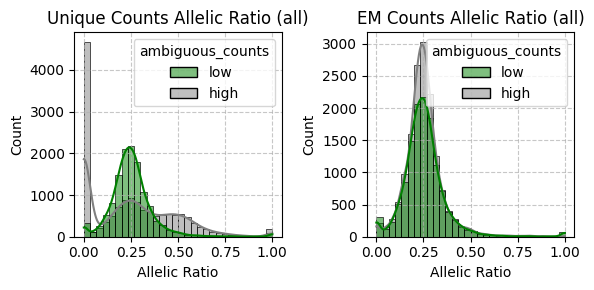

In [27]:
fig = poly.plot_allelic_ratios(
    adata_isoform_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


Most genes exhibit balanced allelic expression, with ratios around 0.25 (1/ploidy). Some genes display extreme ratios, which may represent biologically meaningful patterns or annotation artifacts. Applying a multimapping filter reduces noise from genes with high ambiguous read counts. We will exclude genes showing length differences, as these can introduce bias into the results as well.

In [28]:
high_bias = adata_isoform_filtered [:,(adata_isoform_filtered.var['multimapping_ratio'] < 0.25) & (adata_isoform_filtered.layers['allelic_ratio_unique_counts'] > 0.8).all(axis=0) & (adata_isoform_filtered .var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") ]

high_bias.var

,gene_id,feature_type,transcript_id,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,functional_annotation,n_transcripts,multimapping_ratio
Soltu.DM.02G000560.Hap4,Soltu.DM.02G000560.Hap4,gene,Soltu.DM.02G000560.1.Hap4,Synt_id_15748,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.02G000560.1.Hap1,Soltu.DM.02G000560.1...",hap4,more_5%_difference,4G,None,2,0.004389
Soltu.DM.08G021320.Hap4,Soltu.DM.08G021320.Hap4,gene,Soltu.DM.08G021320.1.Hap4,Synt_id_47662,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.08G021320.1.Hap1,Soltu.DM.08G021320.1...",hap4,more_20%_difference,4G,conserved hypothetical protein,1,0.062745
Soltu.DM.06G032940.Hap4,Soltu.DM.06G032940.Hap4,gene,Soltu.DM.06G032940.1.Hap4,Synt_id_40092,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.06G032940.1.Hap1,Soltu.DM.06G032940.1...",hap4,more_20%_difference,4G,Ribosomal protein L16p/L10e family protein,1,0.248933
Soltu.DM.06G028650.Hap4,Soltu.DM.06G028650.Hap4,gene,Soltu.DM.06G028650.1.Hap4,Synt_id_39549,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.06G028650.1.Hap1,Soltu.DM.06G028650.1...",hap4,more_20%_difference,4G,Ribosomal L27e protein family,1,0.025207
Soltu.DM.05G025890.Hap3,Soltu.DM.05G025890.Hap3,gene,Soltu.DM.05G025890.1.Hap3,Synt_id_35710,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.05G025890.1.Hap1,Soltu.DM.05G025890.1...",hap3,more_20%_difference,4G,homolog of anti-oxidant,2,0.004286
Sotub01g012860.Hap2,Sotub01g012860.Hap2,gene,Sotub01g012860.1.1.Hap2,Synt_id_11456,1hap1_1hap2_1hap3_1hap4_s,"Sotub01g012860.1.1.Hap1,Sotub01g012860.1.1.Hap...",hap2,more_20%_difference,2G,None,1,0.000514
Soltu.DM.06G031650.Hap4,Soltu.DM.06G031650.Hap4,gene,Soltu.DM.06G031650.1.Hap4,Synt_id_39946,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.06G031650.1.Hap1,Soltu.DM.06G031650.1...",hap4,more_20%_difference,4G,pumilio,1,0.157007
Soltu.DM.04G000950.Hap4,Soltu.DM.04G000950.Hap4,gene,Soltu.DM.04G000950.1.Hap4,Synt_id_26660,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.04G000950.1.Hap1,Soltu.DM.04G000950.1...",hap4,more_20%_difference,4G,Ribosomal protein S4,1,0.210949


You can see that alleles with high expression ratios (>0.8) have big length differences. Therefore we will filter them for the allele expression analysis.

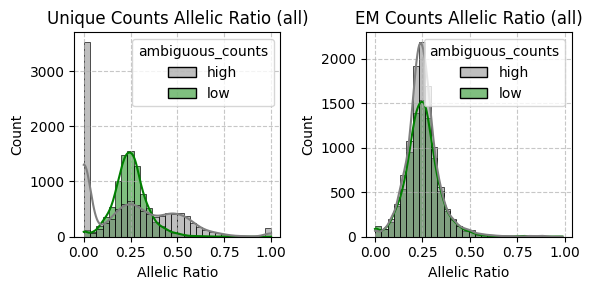

In [29]:
# filter transcripts that are not equal lengths
mask = adata_isoform_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths"
adata_isoform_length_filtered = adata_isoform_filtered[:,mask].copy()
fig = poly.plot_allelic_ratios(
    adata_isoform_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


After filtering for alleles of equal length, several of the highly biased genes are removed.

Another potential source of bias arises from unequal transcript numbers per gene. For example, a novel transcript may have been identified on only one haplotype. Therefore, we will filter to include only genes where all alleles have the same number of transcripts.

Genes with different transcript numbers across alleles: 302
Genes with equal transcript numbers across alleles: 1931


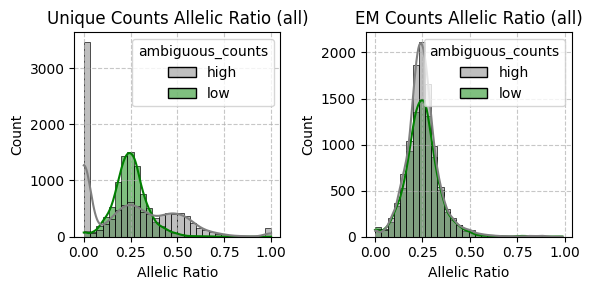

In [30]:
# Group by syntelog ID and check for equal transcript numbers across alleles
synt_ids_same_tx_number = adata_isoform_filtered.var.groupby('Synt_id').aggregate({
    'n_transcripts': set
})

# Count genes with different transcript numbers before filtering
genes_diff_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) > 1)]
print(f"Genes with different transcript numbers across alleles: {len(genes_diff_tx_number)}")

# Keep only syntelogs where all alleles have the same number of transcripts
synt_ids_same_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) == 1)]
print(f"Genes with equal transcript numbers across alleles: {len(synt_ids_same_tx_number)}")

# Filter for equal-length transcripts with equal transcript numbers
mask = (adata_isoform_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & \
       (adata_isoform_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))



adata_isoform_length_filtered = adata_isoform_filtered[:, mask].copy()

# Plot allelic ratios after filtering
fig = poly.plot_allelic_ratios(
    adata_isoform_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s",
    sample='all',
    ratio_type="both",
    figsize=(6, 3),
    kde=True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)

Now there are less alleles with ratios around 0 and >0.8.

### A) Cis: Testing for differential allelic expression

We will test within one condition (here: 'leaf'), wether there are genes where alleles have unbalanced expression.

In [31]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask = (adata_gene_filtered.var["multimapping_ratio"] < 0.25) & (adata_gene_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")& (adata_gene_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & (adata_gene_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))
adata_gene_length_filter = adata_gene_filtered[:,mask].copy()

# Test for differential allelic ratios withing conditions
cis_results_control = poly.test_allelic_ratios_within_conditions(adata_gene_length_filter, 
                                                                 layer="unique_counts", 
                                                                 test_condition= "leaf", 
                                                                 inplace=True)
# Get top differential syntelogs
cis_top_results = poly.get_top_differential_syntelogs(cis_results_control, 
                                                      n=45, sort_by='ratio_difference',
                                                      fdr_threshold=0.05, 
                                                      ratio_threshold=0.1)

Using CPM data from layer: unique_cpm
Processing syntelog 100/211
Processing syntelog 200/211
Found 50 from 211 syntelogs with at least one significantly different allele (FDR < 0.005 and ratio difference > 0.1)


#### Plotting of overall allelic expression ratios

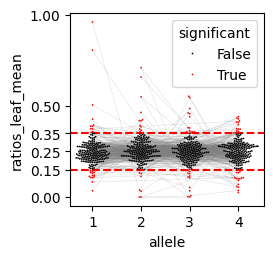

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cis_results_control['significant'] = (cis_results_control['p_value'] < 0.05) & (cis_results_control['ratio_difference'] > 0.1)

# Add a temporary column to track original order
cis_results_control['plot_order'] = range(len(cis_results_control))
# set the colors for significant and non-significant points
palette = {True: 'red', False: 'black'}
# Create the swarm plot
fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.swarmplot(y=cis_results_control['ratios_leaf_mean'], 
              x=cis_results_control['allele'], 
              hue=cis_results_control['significant'], 
              size=1.25,
              ax=ax,
              palette=palette,
              order=['1', '2', '3', '4'])

# Extract point positions from the plot
points_data = []
for collection in ax.collections:
    offsets = collection.get_offsets().data
    for x, y in offsets:
        points_data.append({'x': x, 'y': y})

# Match points to data by y-values (within tolerance)
point_positions = {}
for idx, row in cis_results_control.iterrows():
    y_val = row['ratios_leaf_mean']
    allele_idx = ['1', '2', '3', '4'].index(row['allele'])
    
    # Find matching point (closest in y-value near the correct x position)
    for point in points_data:
        if abs(point['y'] - y_val) < 0.001 and abs(point['x'] - allele_idx) < 0.5:
            if idx not in point_positions:
                point_positions[idx] = (point['x'], point['y'])
                break

# Connect paired points by Synt_id
for synt_id in cis_results_control['Synt_id'].unique():
    subset = cis_results_control[cis_results_control['Synt_id'] == synt_id]
    if len(subset) >= 2:  # Connect all points with same Synt_id
        indices = subset.index.tolist()
        valid_indices = [i for i in indices if i in point_positions]
        
        if len(valid_indices) >= 2:
            for i in range(len(valid_indices) - 1):
                x_vals = [point_positions[valid_indices[i]][0], point_positions[valid_indices[i+1]][0]]
                y_vals = [point_positions[valid_indices[i]][1], point_positions[valid_indices[i+1]][1]]
                ax.plot(x_vals, y_vals, color='gray', linewidth=0.5, alpha=0.2, zorder=0)

plt.yticks([0.0, 0.15, 0.25, 0.35, 0.5, 1.0])
plt.axhline(y=0.35, color='r', linestyle='--')
plt.axhline(y=0.15, color='r', linestyle='--')

plt.show()

#### Plot the results for the genes with large differences in allelic expression

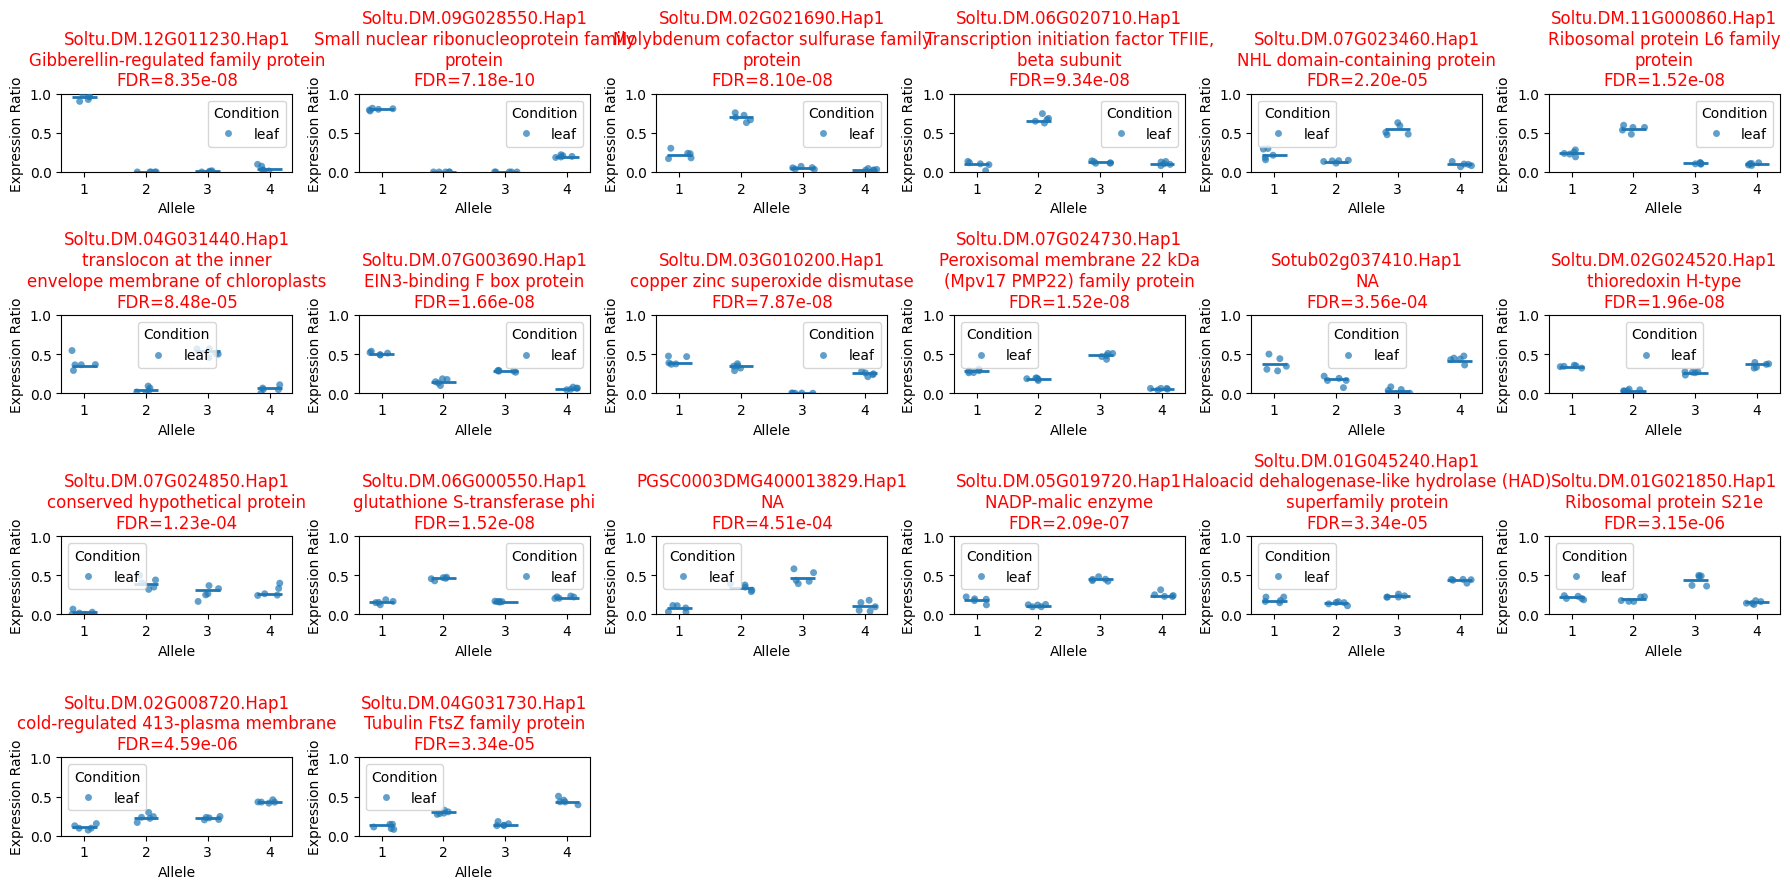

In [ ]:

fig = poly.plot_top_differential_syntelogs(cis_top_results, 
                                           n = 20, 
                                           sort_by='ratio_difference')

#### Plot ratios and CPM for one particular gene

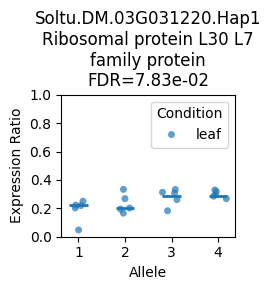

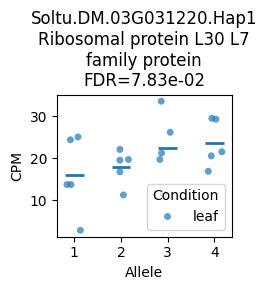

In [37]:
gene_id = "Soltu.DM.03G031220"

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['gene_id'].str.contains(gene_id)]
ax1 = poly.plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3),sort_by='ratio_difference')

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['gene_id'].str.contains(gene_id)]
ax2 = poly.plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )

#### We can also look at genes where all alles have balanced expression 

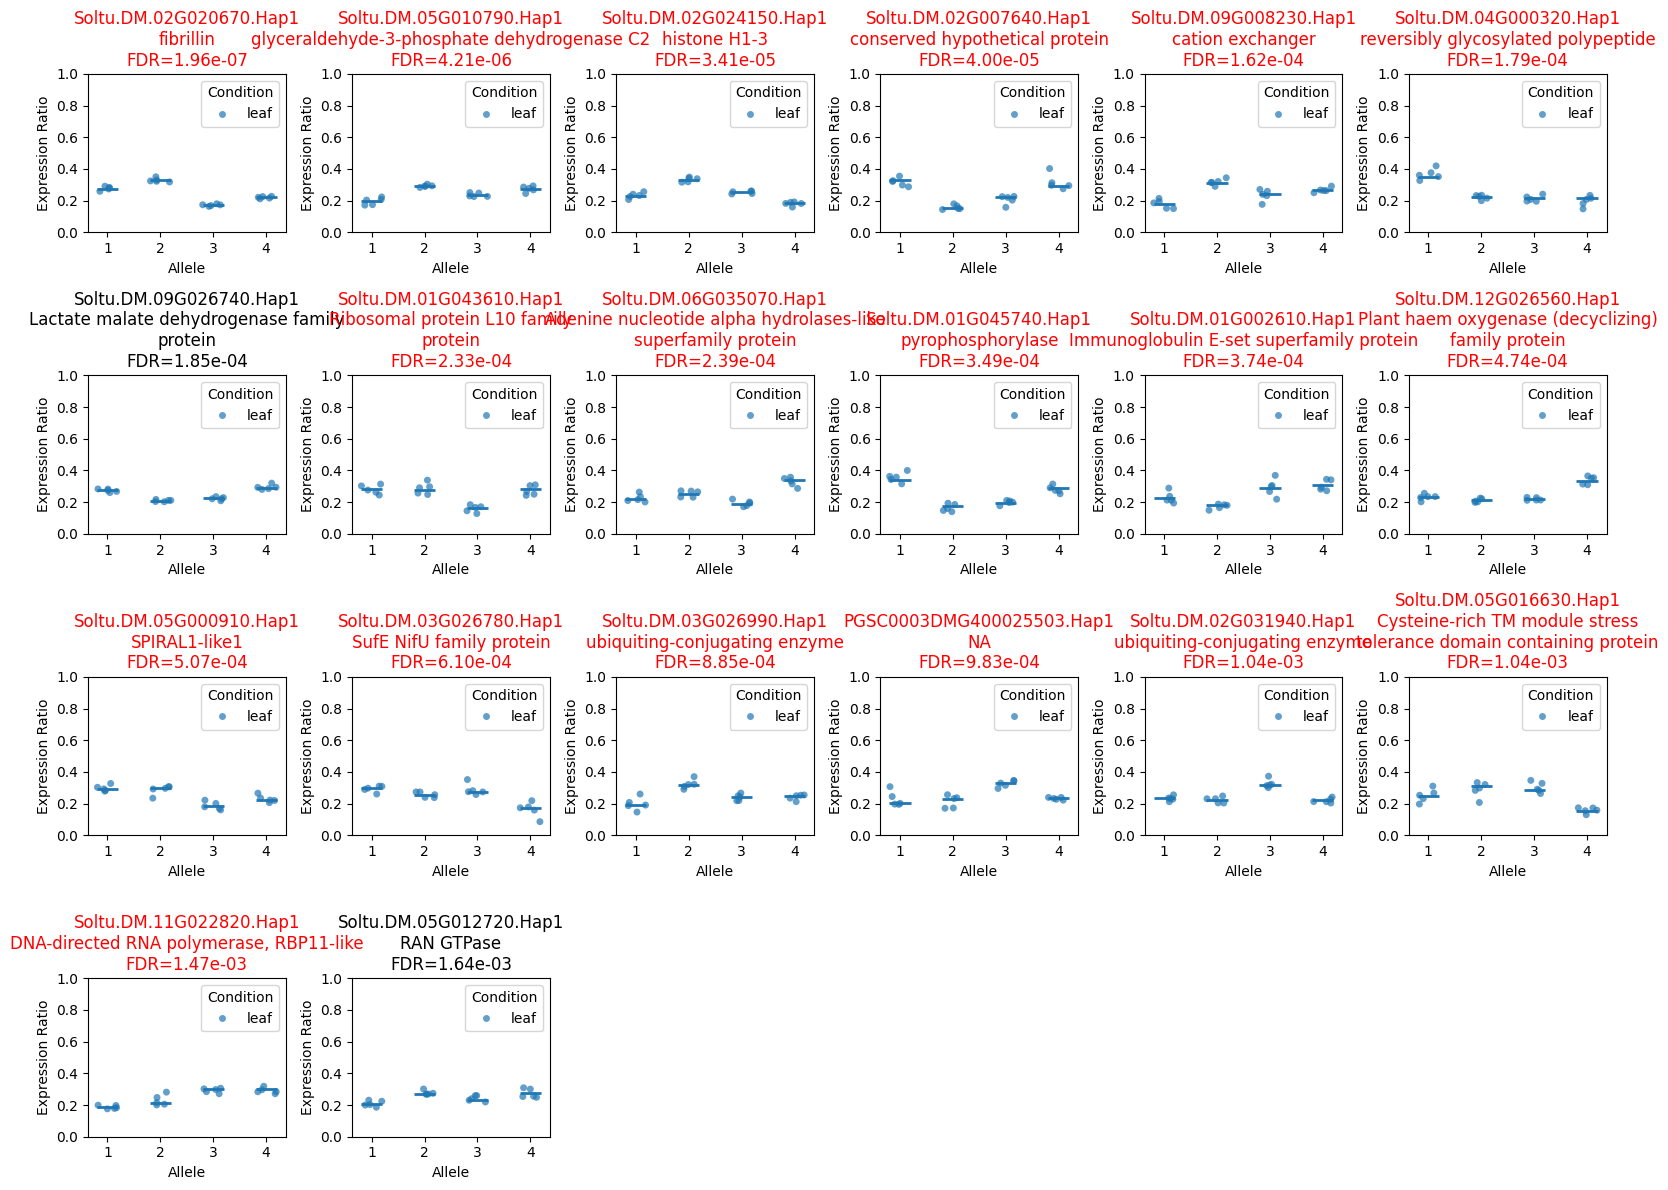

In [38]:
grouped_results= cis_results_control.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': 'max' , # Assuming this is the correct column name
    'gene_id': 'first'  # Concatenate gene IDs
        })
# split the last prefix from transcript_id
grouped_results['gene_id'] = grouped_results['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
    # Print summary
significant_results = grouped_results[(grouped_results['FDR'] < 0.05) & (grouped_results['ratio_difference'] > 0.1)]

unsignificant_results = grouped_results[(grouped_results['FDR'] >= 0.05) | (grouped_results['ratio_difference'] <= 0.1)]

# Filter the syntelog results with balanced expression for plotting
mask = unsignificant_results.index
balanced_cis_results = cis_results_control[cis_results_control['Synt_id'].isin(unsignificant_results.index)]
fig = poly.plot_top_differential_syntelogs(balanced_cis_results, 
                                           n = 20)


### B) Trans: Testing for differences in allelic expression between conditions

Now we only filter of syntenic group, as multimapping and difference in transcript length should not bias the results when comparing conditions

In [39]:
# Filter to only include synteny category "1hap1_1hap2_1hap3_1hap4_s" 
mask = (adata_isoform_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")
adata_gene_syntelogs = adata_gene_filtered[:,mask].copy()

Using CPM data from layer: unique_cpm


Processing syntelog 100/697
Processing syntelog 200/697
Processing syntelog 300/697
Processing syntelog 400/697
Processing syntelog 500/697
Processing syntelog 600/697
Found 264 from 691 syntelogs with at least one significantly different allelic ratio (FDR < 0.05)


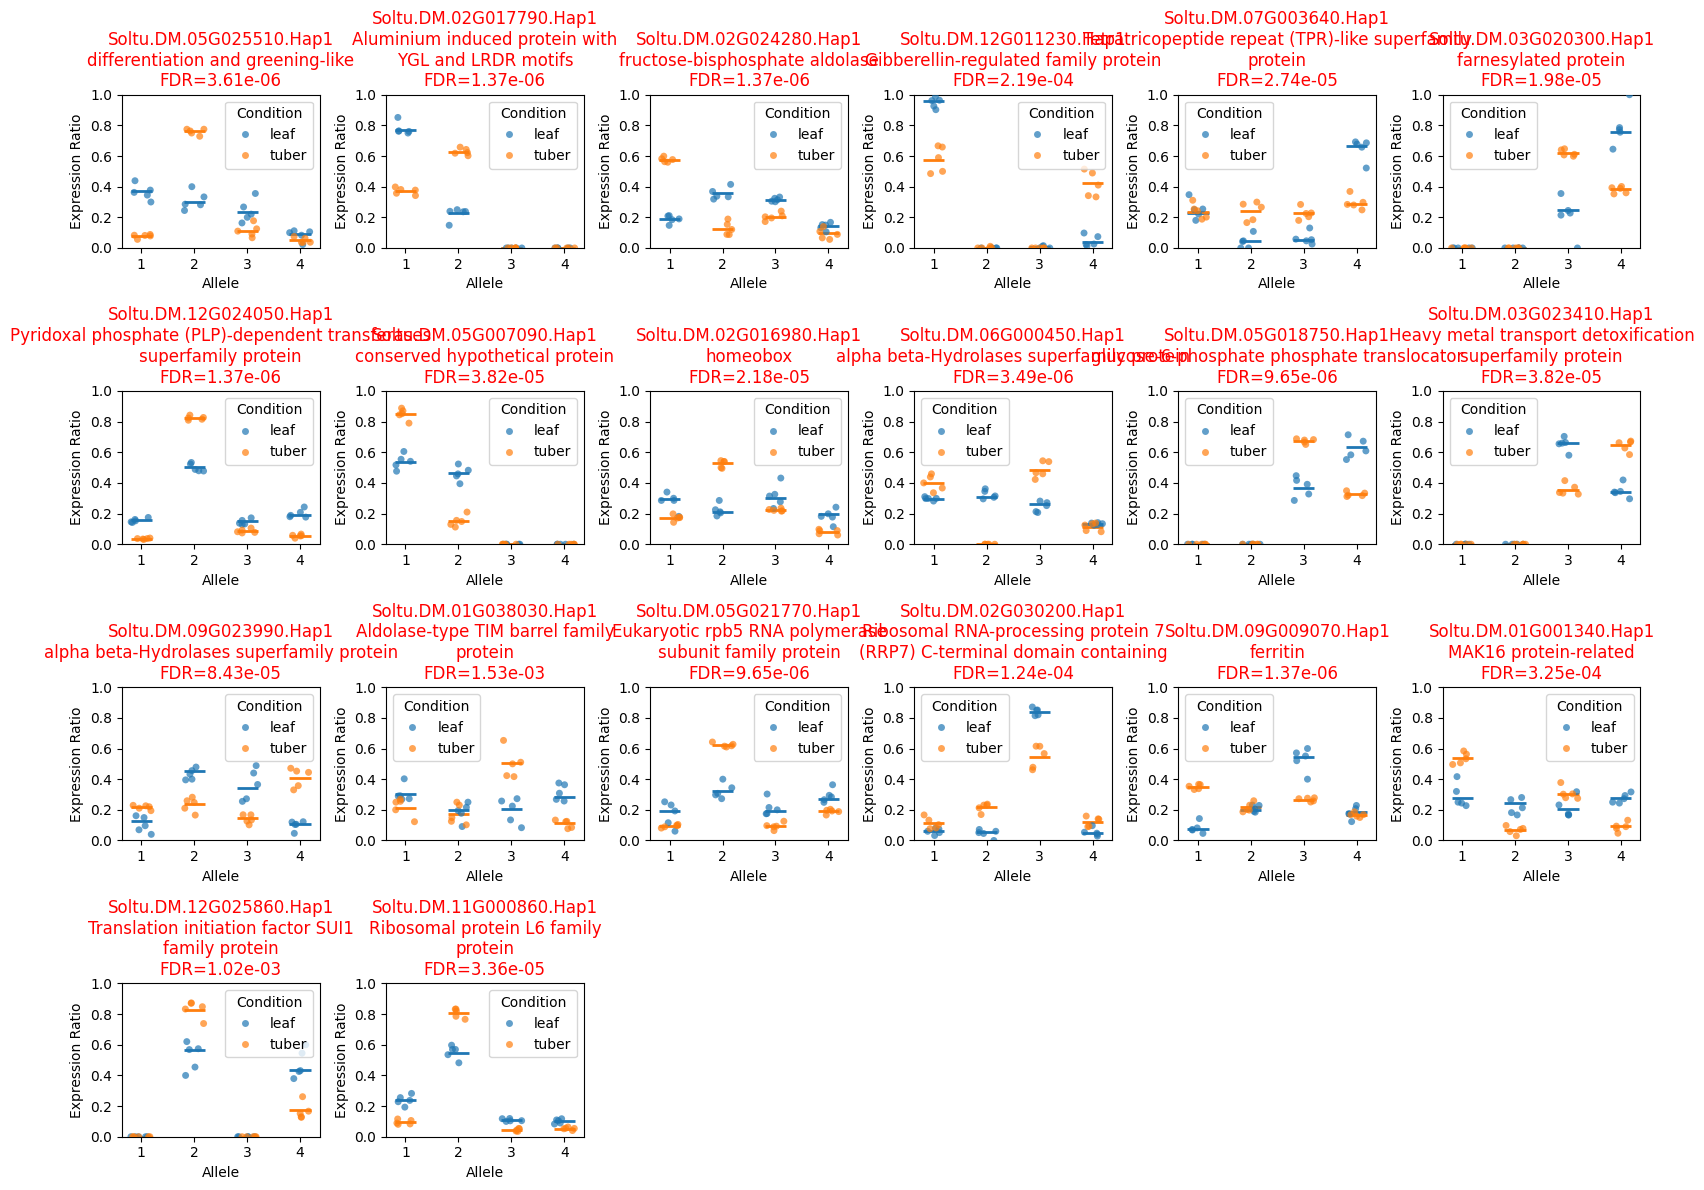

In [40]:
# Run allelic ratio test
results_df_trans = poly.test_allelic_ratios_between_conditions(adata_gene_syntelogs)

# Get top differential syntelogs
top_results_trans = poly.get_top_differential_syntelogs(results_df_trans, n=50, sort_by='ratio_difference', fdr_threshold=0.05)

# Plot the results
fig = poly.plot_top_differential_syntelogs(top_results_trans, 
                                           n = 20, 
                                           difference_threshold=0.1, 
                                           sort_by='ratio_difference', 
                                           sig_threshold=0.05)

#### Plot Ribosomal protein L3 as example 

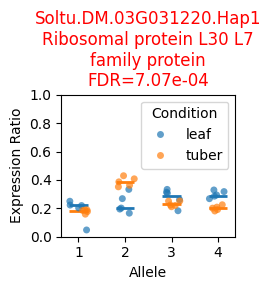

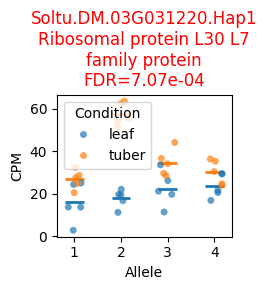

In [41]:
gene_id = "Soltu.DM.03G031220"

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = poly.plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference' )

ax2 = poly.plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )

##### Plot vacuolar ATP synthase subunit A

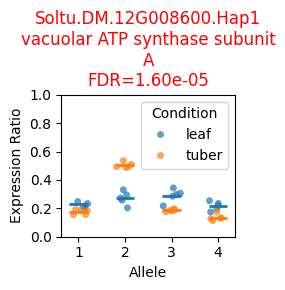

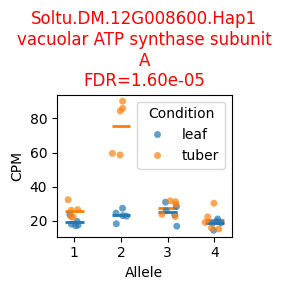

In [42]:
gene_id = "Soltu.DM.12G008600"

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = poly.plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference')

ax2 = poly.plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )

In [43]:
top_results_trans['Unitato_gene_id'] = top_results_trans['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
# group by Synt_id and get the min FDR and max ratio_difference
top_results_trans_grouped = top_results_trans.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': list , # Assuming this is the correct
    'allele' : list,
    'gene_id': list,
    'Unitato_gene_id': 'first'  # Get unique gene IDs

})
# save the results to a tsv
# top_results_trans_grouped.to_csv()

/tmp/ipykernel_550287/3657271931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_results_trans['Unitato_gene_id'] = top_results_trans['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)


## 3) Isoform level analysis

In the previous steps we tested for differences in in allelic expression on gene level, no we are looking at the isoform level

##### Filtering out genes with low expression

In [78]:
adata_isoform_filtered = poly.filter_low_expressed_genes(
    adata_isoform,
    min_expression=5.0,  # 20 counts
    mode= 'all',
    group_col = 'gene_id',
    library_size_dependent=True, # this filters min_expression based on CPM of unique counts
    verbose=True)

Using library-size adjusted thresholds:
  SRR14993893: 2.05
  SRR14993892: 3.96
  SRR14993895: 9.57
  SRR14993894: 17.98
  SRR14995031: 10.34
  ... and 5 more
Filtered out 197668 groups
Kept 5508 / 250224 items


In [79]:
adata_isoform_filtered = poly.calculate_allelic_ratios(adata_isoform_filtered, 'unique_counts' )
adata_isoform_filtered = poly.calculate_multi_ratios(adata_isoform_filtered, 'unique_counts', 'ambiguous_counts')
adata_isoform_filtered = poly.calculate_per_allele_ratios(adata_isoform_filtered, unique_layer='unique_counts', multi_layer='ambiguous_counts')

### C) Testing for differential isoform usage between conditions

Now we are testing for differential isofrom usage (DIU). Are there different isoforms expressed in tuber than in leaves?

In [80]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask =  (adata_isoform_filtered.var["tx_multimapping_ratio_per_allele_weighted_average"] < 0.3) &  (adata_isoform_filtered.var["transcript_multimapping_ratio"] < 0.3)
adata_isoform_multimapping_filter = adata_isoform_filtered[:,mask].copy()

# Test for differential allelic ratios withing conditions
DIU_results, DIU_plotting_result = poly.test_isoform_DIU_between_conditions(adata_isoform_multimapping_filter, 
                                                                       layer="unique_counts", 
                                                                       inplace=True)

Calculating isoform ratios...
Processing gene 100/3015
Processing gene 200/3015
Processing gene 300/3015
Processing gene 400/3015
Processing gene 500/3015
Processing gene 600/3015
Processing gene 700/3015
Processing gene 800/3015
Processing gene 900/3015
Processing gene 1000/3015
Processing gene 1100/3015
Processing gene 1200/3015
Processing gene 1300/3015
Processing gene 1400/3015
Processing gene 1500/3015
Processing gene 1600/3015
Processing gene 1700/3015
Processing gene 1800/3015
Processing gene 1900/3015
Processing gene 2000/3015
Processing gene 2100/3015
Processing gene 2200/3015
Processing gene 2300/3015
Processing gene 2400/3015
Processing gene 2500/3015
Processing gene 2600/3015
Processing gene 2700/3015
Processing gene 2800/3015
Processing gene 2900/3015
Processing gene 3000/3015
Found 15 from 92 genes with at least one significantly different isoform usage (FDR < 0.05)
Skipped 61 isoforms due to zero counts
Created plotting table with 1250 rows (one per replicate, condition,

For plotting of differential isoform usage we also need to add the gene structure from the gtf files.

In [81]:
# we use the original unitato annotations as they contain CDS information
ensembl_gtf_path = f"{input_dir}/unitato2Atl.with_chloroplast_and_mito.no_scaffold.agat.gtf"
annotation = RNApy.read_ensembl_gtf(ensembl_gtf_path)

# add the bambu annotations to the annotation dataframe to also include novel iosforms and genes
bambu = f"{input_dir}/combined.fixed.gtf"
bambu_annotation = RNApy.read_ensembl_gtf(bambu)
bambu_annotation = bambu_annotation.filter(pl.col("transcript_id").str.contains("Bambu"))


annotation.extend(bambu_annotation)
annotation_df = annotation.to_pandas()
annotation_df['gene_id_unitato'] = annotation_df['gene_id'].str.rsplit('.', n=1).str[0]

# back to polar
annotation_pl = pl.from_pandas(annotation_df)

In [82]:
figures = poly.plot_differential_isoform_usage(
    results_df=DIU_plotting_result,
    annotation_df=annotation_pl,
    fdr_threshold=0.05,
    ratio_difference_threshold=0.3
)

Detected layer: unique_counts (using column: unique_counts_cpm)
Found 15 genes with significant isoforms. Plotting all isoforms for these genes.
Processing gene: BambuGene12045


Processing gene: PGSC0003DMG400011125.Hap2


Processing gene: Soltu.DM.02G014130.Hap4


Processing gene: Soltu.DM.03G032520.Hap3


Processing gene: Soltu.DM.06G012380.Hap0


Processing gene: Soltu.DM.07G022010.Hap1
Skipping Soltu.DM.07G022010.Hap1 as it has only one transcript
Processing gene: Soltu.DM.07G022010.Hap3
Skipping Soltu.DM.07G022010.Hap3 as it has only one transcript
Processing gene: Soltu.DM.07G026360.Hap0


Processing gene: Soltu.DM.09G025500.Hap4


Processing gene: Soltu.DM.10G027570.Hap0


Processing gene: Soltu.DM.10G027570.Hap2


Processing gene: Soltu.DM.11G022220.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.11G022220.3.Hap1. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.11G023050.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.11G023050.1.Hap1. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.12G000950.Hap3


Processing gene: Soltu.DM.12G003180.Hap0


Generated 13 plots for differential isoform usage


### D) Testing for differential isofrom strucuture between haplotypes


Now we will test if there are any genes that have a different isoform expressed on the different haplotypes. This can be caused for instance by mutations in splice sites.

In [83]:
#First add exon structure information to your AnnData object
gtf_file = bambu

# Add structure information (this can take some time)
poly.add_structure_from_gtf(adata_isoform_filtered, 
                            gtf_file, 
                            inplace=True, 
                            verbose=True)

Loading GTF file: /scratch/nadjafn/LR_DESIREE_PAPER/zenodo/polyase_tutorial_atlantic/combined.fixed.gtf
Processing exon structures...
Processed 250224 transcripts
Exon count distribution:
n_exons
1     70765
2     53581
3     32202
4     19639
5     14515
6     11146
7      9139
8      7440
9      6317
10     5105
Name: count, dtype: int64
Calculated introns for 179459 multi-exon transcripts
Intron count distribution:
n_introns
1     53581
2     32202
3     19639
4     14515
5     11146
6      9139
7      7440
8      6317
9      5105
10     3976
Name: count, dtype: int64
Adding structure information to AnnData.var...
Matched structure information for 5508/5508 transcripts
Successfully added exon structure information for 250224 transcripts
  - Intron structures calculated for multi-exon transcripts


In [86]:
mask =(adata_isoform_filtered.var["tx_multimapping_ratio_per_allele_weighted_average"] < 0.25) & \
      (adata_isoform_filtered.var["multimapping_ratio"] < 0.25) &\
      (adata_isoform_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")

#mask = adata_isoform_filtered.var["Synt_id"] == "Synt_id_59067"
adata_isoform_multimapping_filtered = adata_isoform_filtered[:,mask].copy()


#  Run structure-based DIU analysis
results_DIU_allele, results_DIU_plotting = poly.test_differential_isoform_structure(
    adata_isoform_multimapping_filtered, 
    layer="unique_counts",
    test_condition="all",  # or "all" to use all conditions
    min_similarity_for_matching=0.9,
    inplace=True
)

DEBUG: Found 10 samples for condition 'all'
DEBUG: Found 418 syntelogs to process
Rubredoxin-like superfamily protein

DEBUG Syntelog Synt_id_60959: 4 haplotypes, 4 transcripts
DEBUG: Haplotype expressions: {'hap2': np.int64(807), 'hap4': np.int64(691), 'hap3': np.int64(764), 'hap1': np.int64(826)}
DEBUG: Selected reference haplotype: hap1 (expression=826)
DEBUG: Reference haplotype hap1 has 1 isoforms
  Soltu.DM.12G010870.1.Hap1: expression=826
  hap2: Matched to MAJOR (Soltu.DM.12G010870.1.Hap2, sim=0.996)
  hap4: Matched to MAJOR (Soltu.DM.12G010870.1.Hap4, sim=0.999)
  hap3: Matched to MAJOR (Soltu.DM.12G010870.1.Hap3, sim=0.999)
DEBUG: Found 4 haplotype matches
DEBUG: Major on all haplotypes: True
DEBUG: Testing using MAJOR isoform
DEBUG: Reference counts: [ 25  42 103], totals: [ 25  42 103]
Tetratricopeptide repeat (TPR)-like superfamily protein

DEBUG Syntelog Synt_id_25872: 4 haplotypes, 4 transcripts
DEBUG: Haplotype expressions: {'hap3': np.int64(1218), 'hap1': np.int64(2585

In [87]:
fig = poly.plot_allele_specific_isoform_structure(results_DIU_plotting,
                                                  annotation_df = annotation_pl, 
                                                  ratio_difference_threshold=0.2)

Detected layer: isoform (using column: isoform_cpm)
Found 2 syntelogs with significant allelic differences. Plotting all isoforms for these syntelogs.
Processing Synt_id: Synt_id_38611
Gene: Soltu.DM.06G021330.Hap4


Processing Synt_id: Synt_id_59067
Gene: Soltu.DM.11G023050.Hap3


Generated 2 plots for allele-specific isoform structure


### E) Vizualization of alignments

To exlude false positive results it is essential to also look at the alignments in a genome browser. We recoomend jBrowse2 as this allows to open several chromosomes at the same time. So we can view the haplotypes all at once.
The downsampled reads with haplotype tags are in 'longrnaseq/output/haplotag/*bam'.

You can color and sort the aligned reads by the `HP` tag.

This are the alignments of a gene with difference in isoform strucure due to a splice site mutation:

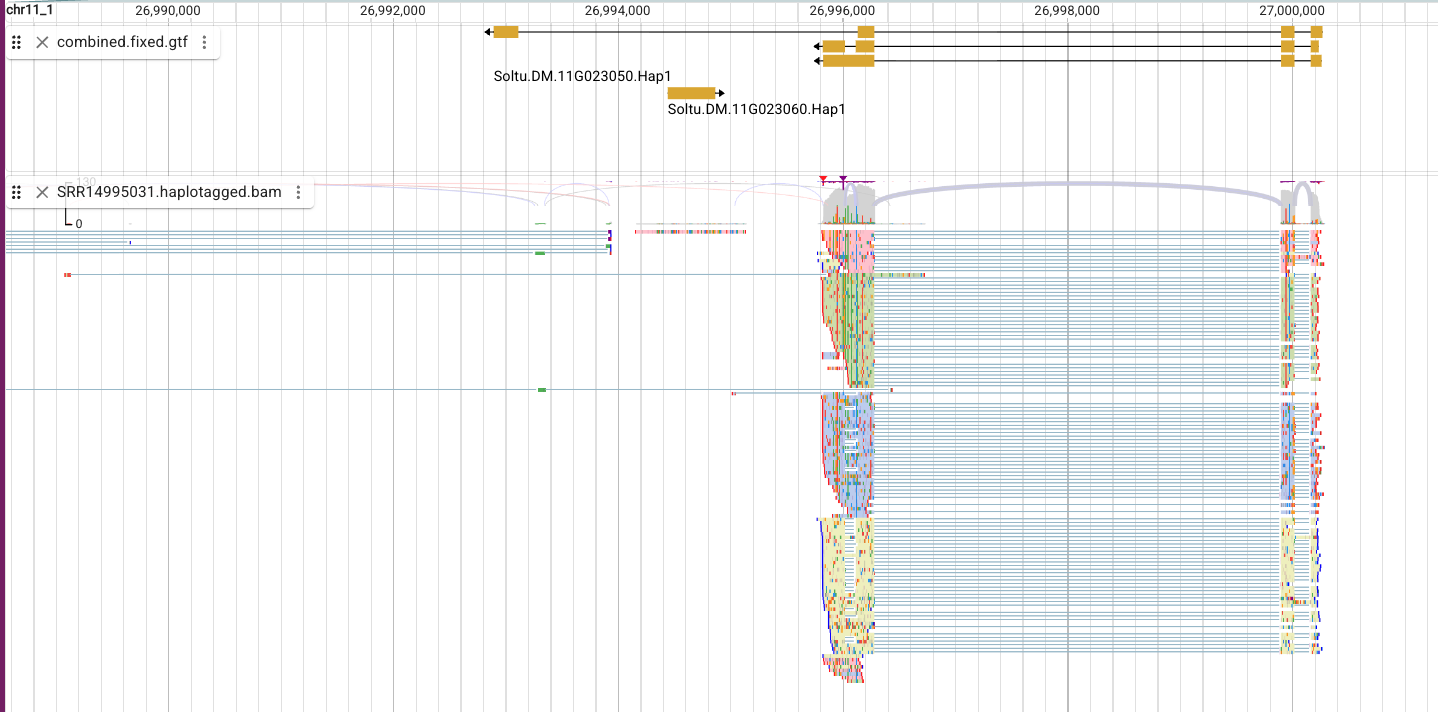